Project 2

# Avocados Data Analysis - Average Price Prediction

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Accessing the Dataset

In [38]:
avocados = pd.read_csv('avocado.csv')

In [39]:
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Exploratory Data Analysis

In [40]:
avocados.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [41]:
# Droping Column "Unnamed:0"- Useless Variable
avocados.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
avocados.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


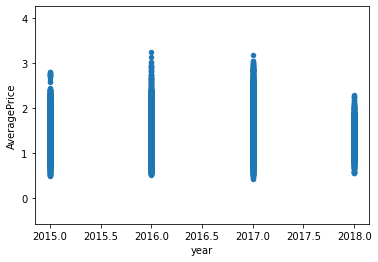

In [43]:
# scatter plot Average Price Vs Year - To know the change in price
data = pd.concat([avocados['AveragePrice'], avocados['year']], axis=1)
data.plot.scatter(x='year', y='AveragePrice', ylim=(min(avocados['AveragePrice'])-1,max(avocados['AveragePrice'])+1));

In [44]:
avocados['Date']=pd.to_datetime(avocados['Date'])
avocados['Month']=avocados['Date'].apply(lambda x:x.month)
avocados['Day']=avocados['Date'].apply(lambda x:x.day)

In [45]:
avocados.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average Price')

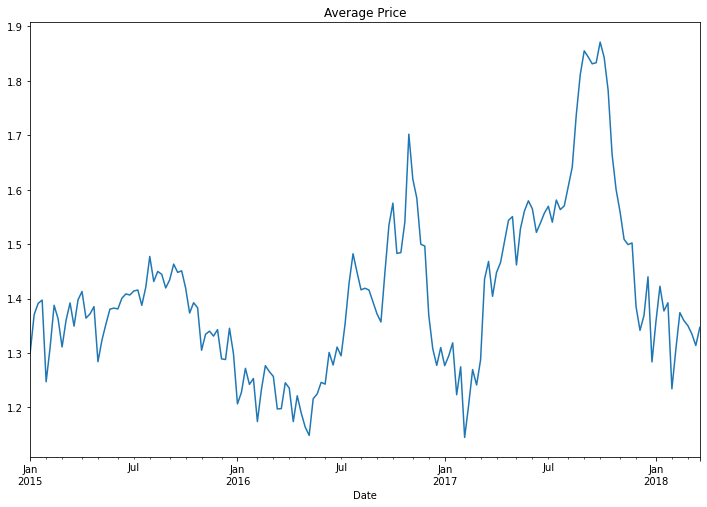

In [46]:
byDate=avocados.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

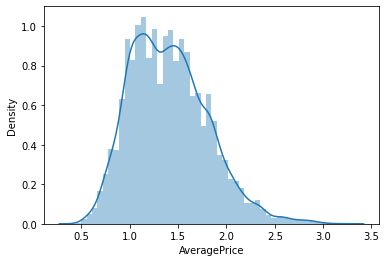

In [47]:
# AveragePrice Value Distribution
sns.distplot(avocados['AveragePrice']);

<AxesSubplot:>

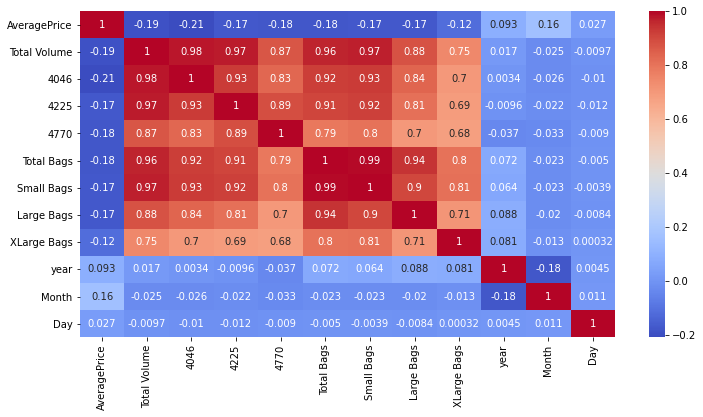

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(avocados.corr(),cmap='coolwarm',annot=True)

Removing Unwanted Columns - For Model Fitting

In [49]:
avocado = avocados.drop(['Date','region','type'], axis = 1)

In [50]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14


# MODEL FITTING

In [51]:
# Instialzing Value for Model Training 

In [52]:
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags','year','Small Bags','Large Bags','XLarge Bags']

In [53]:
x = avocados[features]                 #Features Values
y = avocados.AveragePrice              #Output Value

lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice'is continuous

Model No.1 - Multiple Linear Regression

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.3130431920109739
MSE: 0.15207694164815433
RMSE: 0.38997043688997035


The RMSE is low so we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions.

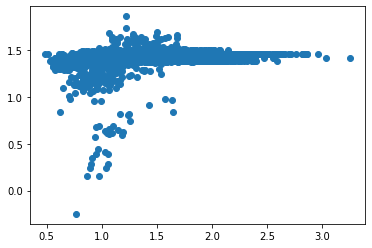

In [57]:
plt.scatter(x=y_test,y=pred)

As we can see that we dont have a straigt line so I am not sure that this is the best model we can apply on our data

We will try other models for better accuracy

Model No.2 -  DecisionTree Regressor mode

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

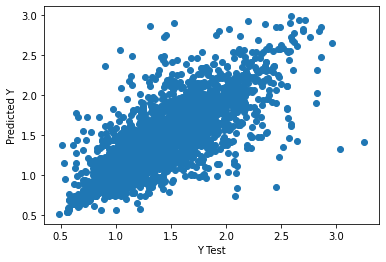

In [59]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Here, we can see that we nearly have a straigt line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.16281917808219176
MSE: 0.06471509589041097
RMSE: 0.25439161914342023



RMSE is lower than the previous one we got with Linear Regression. 

So, Lets try other models for better RMSE value

Model No.3 - KNN Model

In [61]:
from sklearn.neighbors import KNeighborsRegressor
KNN= KNeighborsRegressor(n_neighbors = 2)
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test) 

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.177013698630137
MSE: 0.06874630136986301
RMSE: 0.2621951589367413


Text(0, 0.5, 'Predicted Y')

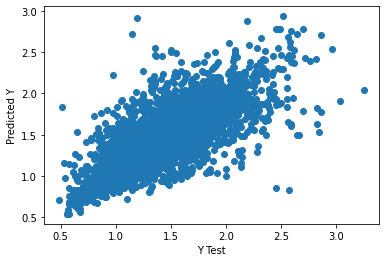

In [63]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

RMSE Value of KNN model value is Lower than that of Decision Tree and Almost Same as of Linear Regression. Therefore, We Can try more models.

Model No.4 - Random Forest Model

In [64]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12432865753424657
MSE: 0.03210661956712329
RMSE: 0.1791832011298026


 we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

,Y Test,Pred
8604,0.82,1.0459
2608,0.97,1.0256
14581,1.44,1.3958
4254,0.97,0.9078
16588,1.45,1.4576


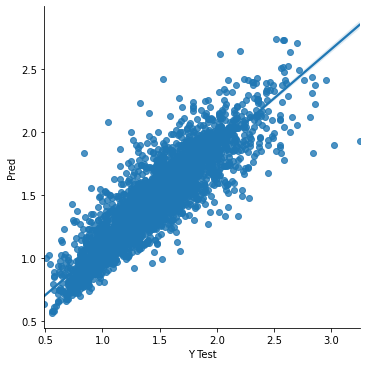

In [66]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

As we can straight line and points in graphs.
We can concloude that  Random Forest Model fits best for given problem Statement.